## Final Project Submission

* Please fill out:
* John Paul Hernandez Alcala
* Part Time
* Scheduled project review date/time: 
* Instructor name: Eli
* Blog post URL:


### Libraries used

In [9]:
#!pip install omdb #if not installed already

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import omdb
import itertools as it
from datetime import datetime, date
from matplotlib.patches import Rectangle
import numpy as np

%matplotlib inline  

### Import Cleaned Budget Data

First we are gonna bring in the movie budget dataframe we obtained from [MovieBudgetData.ipynb](./MovieBudgetData.ipynb) with some python magic tricks[1]

In [1]:
%%capture 
%run ./MovieBudgetData.ipynb

In [2]:
%store -r dfmoviebudget
dfmoviebudget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [3]:
dfmoviebudget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5126 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5126 non-null   int64 
 1   release_date       5126 non-null   object
 2   movie              5126 non-null   object
 3   production_budget  5126 non-null   int64 
 4   domestic_gross     5126 non-null   int64 
 5   worldwide_gross    5126 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 280.3+ KB


We can see from above that we have 5126 entries, but index is labelled from 0 - 5781. Let's reset this.

In [4]:
df = dfmoviebudget.reset_index(drop=True)

### Return On Investment (R.O.I.)

Let's calculate the return on investment for each title for only worldwide gross since it includes domestic gross [2]

In [5]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [6]:
#return on investment = (gain from investment — cost of investment) / cost of investment
df.loc[:len(df), 'Worldwide R.O.I.(%)'] = (df.loc[:len(df),'worldwide_gross'] 
                                           - df.loc[:len(df),'production_budget']) / df.loc[:len(df),'production_budget'] *100

In [7]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Worldwide R.O.I.(%)
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636


### Breaking Down Release Date By Year, Season, Month, and Day

We are going to start by separating the year into a separate column for future analysis in another Jupyter Notebook (see bottom of document).

In [10]:
#This code uses datetime library and documentatoin to use datetime.strptime() [5, 6]
df.loc[:len(df),'year'] = df.release_date.map(lambda Date_string: str(datetime.strptime(Date_string, '%b %d, %Y').year))
#Lambda allows us to define a variable 'Date_string' and then use it in other functions such as season()
#We did not use df.[newcol] = because python prevers to have a defined length for the new column.

In [11]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Worldwide R.O.I.(%),year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,553.257713,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-57.210757,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636,2017


To begin the separation, we will define a function that will help determine the season for a given numerical month based on Northern Meteorological seasons. [3]

In [12]:
def season(month):
    """Takes the numerical month (1-12), and outputs a string season based on Northern Meteorological Seasons.
    Spring: March-May, Summer: June-August, Fall: September-November, Winter: December-Feburary
    """
    seasons= {'Spring':{3:1, 4:1, 5:1}, 'Summer':{6:1, 7:1, 8:1}, 'Fall':{9:1, 10:1, 11:1}, 'Winter':{12:1, 1:1, 2:1}}
    if (month <= 12) & (month > 0):
        for key, value in seasons.items(): #iterates through each season and it's values
            if value.get(month): #this functins checks if the inputed numeric month exists in the current key value pair
                return key #if it does match then return the key as a string
            #if no match, will iterate to the next key value pair.
    
    else:#makes sure a numeric value between 1-12 is entered
        print('month needs to be a numeric value between 1-12')

We use Northern Meteorological seasons vs. Astronomical seasons because 13/15 of the top box office territories are countries in the Northern Hemisphere and are "more closely tied to our monthly civil calendar"; this in turn makes it easier to calculate monthly statistics which is very useful for agriculture, commerce, and a variety of other purposes." [4]

Next we will take the string info from the release date, derive a season from it, and insert it into a new column.

In [13]:
#This code uses datetime library and documentatoin to use datetime.strptime() [5, 6]
df.loc[:len(df),'season'] = df.release_date.map(lambda Date_string: season(datetime.strptime(Date_string, '%b %d, %Y').month))
#Lambda allows us to define a variable 'Date_string' and then use it in other functions such as season()
#We did not use df.[newcol] = because python prevers to have a defined length for the new column.

In [14]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Worldwide R.O.I.(%),year,season
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,553.257713,2009,Winter
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,2011,Spring
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-57.210757,2019,Summer
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139,2015,Spring
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636,2017,Winter


After this, we can also use the release date to derive a string month.

In [15]:
 df.loc[:len(df),'month'] = df.release_date.map(lambda Date_string: Date_string.split()[0]) 
#lambda function helps manipulate string however we want

In [16]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Worldwide R.O.I.(%),year,season,month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,553.257713,2009,Winter,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,2011,Spring,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-57.210757,2019,Summer,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139,2015,Spring,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636,2017,Winter,Dec


Finally, we also use the release date to derive a string day. [5,6]

In [17]:
df.loc[:len(df),'day'] = df.release_date.map(lambda Date_string:datetime.strftime(datetime.strptime(Date_string, '%b %d, %Y'), '%a'))

In [18]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Worldwide R.O.I.(%),year,season,month,day
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,553.257713,2009,Winter,Dec,Fri
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,2011,Spring,May,Fri
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-57.210757,2019,Summer,Jun,Fri
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139,2015,Spring,May,Fri
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636,2017,Winter,Dec,Fri


### Scatter Plot of Worldwide R.O.I.

Now let us start visualizing our data!

First we check the distribution of the worldwide R.O.I. percentage with a histogram and boxplot.[7]

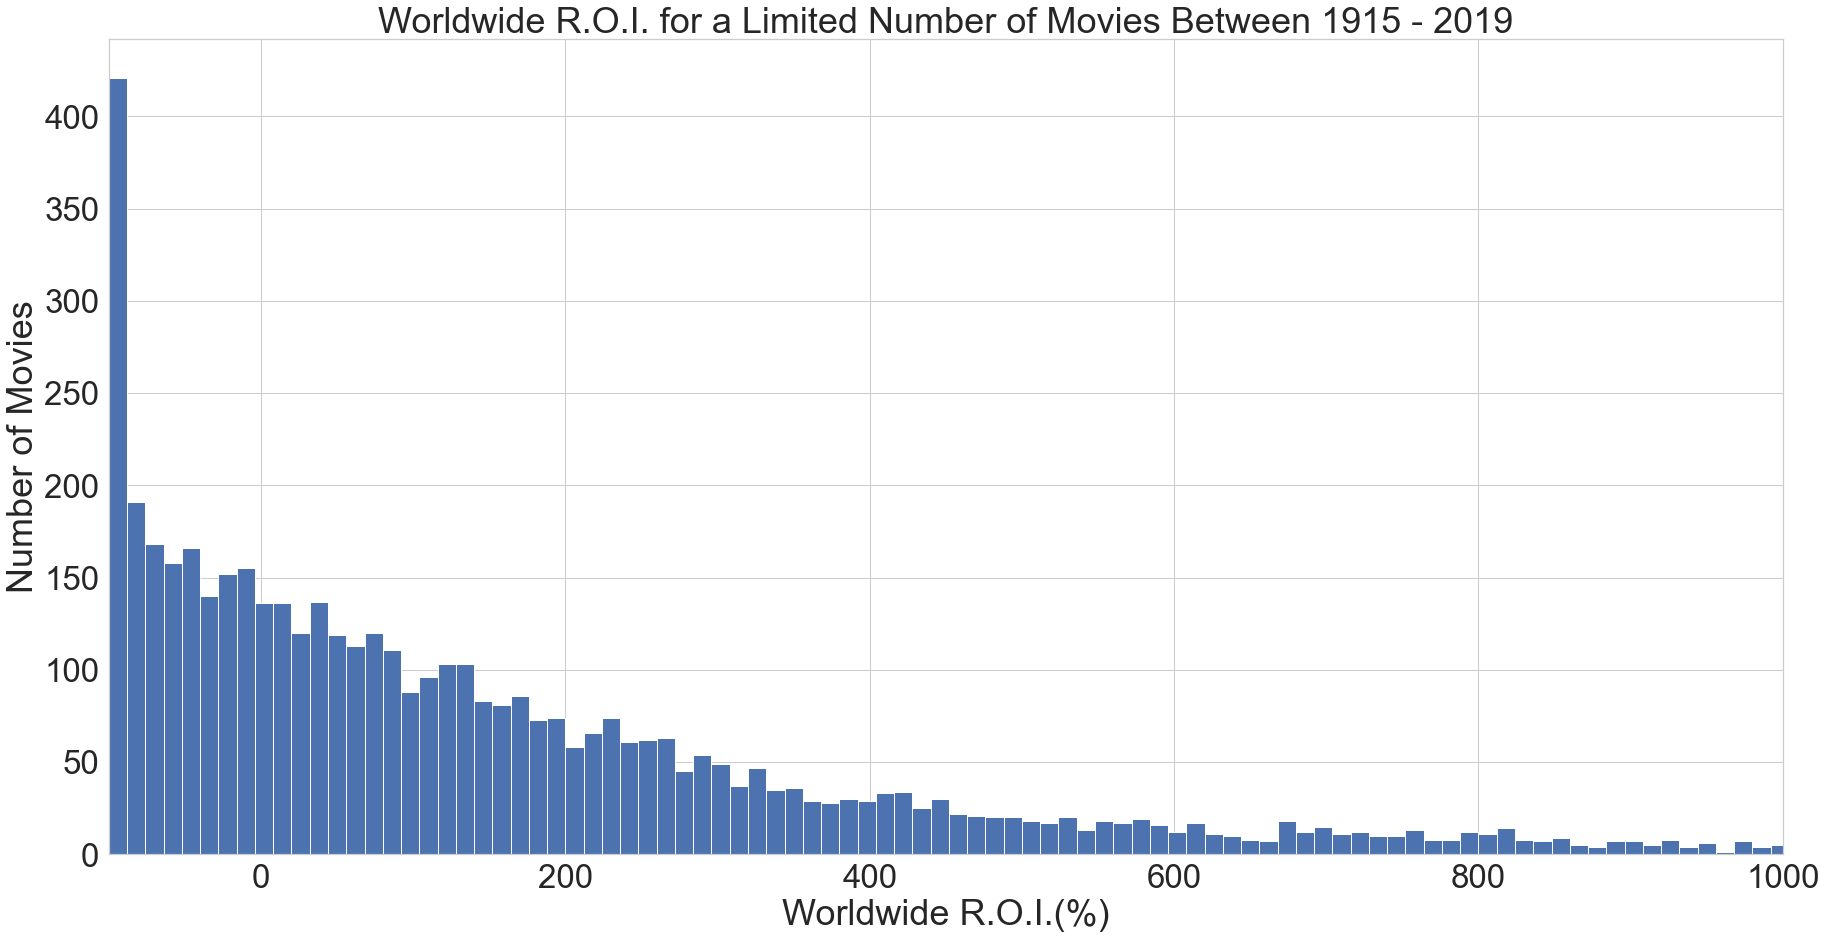

In [19]:
sns.set(style="whitegrid", font_scale=3)
#sets the style of the figure that will soon be created

#creats the figure with a 30 width and 15 length
fig = plt.figure(figsize = (30,15))
plt.axes(xlim=[-100,1000]) #Without this you would see nothing because it is postively skewed!

#number of bins chosen to show data better; this is the number of bins data points can fall into
plt.hist(df['Worldwide R.O.I.(%)'], bins=15000)
plt.title('Worldwide R.O.I. for a Limited Number of Movies Between 1915 - 2019')
plt.xlabel('Worldwide R.O.I.(%)')
plt.ylabel('Number of Movies')

plt.show()

### Box Plot of Worldwide R.O.I.

In [20]:
sns.set(style="whitegrid", font_scale=2)
fig = plt.figure(figsize = (11,8))
plt.axes(ylim=[-150, 850])#pre set for better appearance

#fliers are also outliers of data
ax = sns.boxplot(x='Worldwide R.O.I.(%)', data=df, fliersize=8, showfliers=True, orient='v')

#This finds the median of the data and labels it in white on the boxplot[]
median = round(df['Worldwide R.O.I.(%)'].median(),1) #rounds to the nearest first decimal place
xtick = ax.get_xticks() #gets tick location
vertical_offset = median * 0.05 #offsets slightly off of the median line
ax.text(xtick, median + vertical_offset, median, horizontalalignment='center', size='x-small',color='w',weight='semibold')

ax.set_title('Worldwide R.O.I. for Movies')

plt.show()


C:\Users\johnh\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 792x576 with 1 Axes>

From above we can see that the data is positively skewed. Fortunately, with the boxplot, we see that we can use the median to give us a better idea of overall data distribution.

From the R.O.I distribution, we now have a way to gauge what is a frequent or "average" R.O.I. value based on the median value we have and based on where the 1st quartile and 3rd quartile borders enclose. 

Let's move on to figuring out how many movies were released for each season

### Bar Graph of Movies Released Based on Season

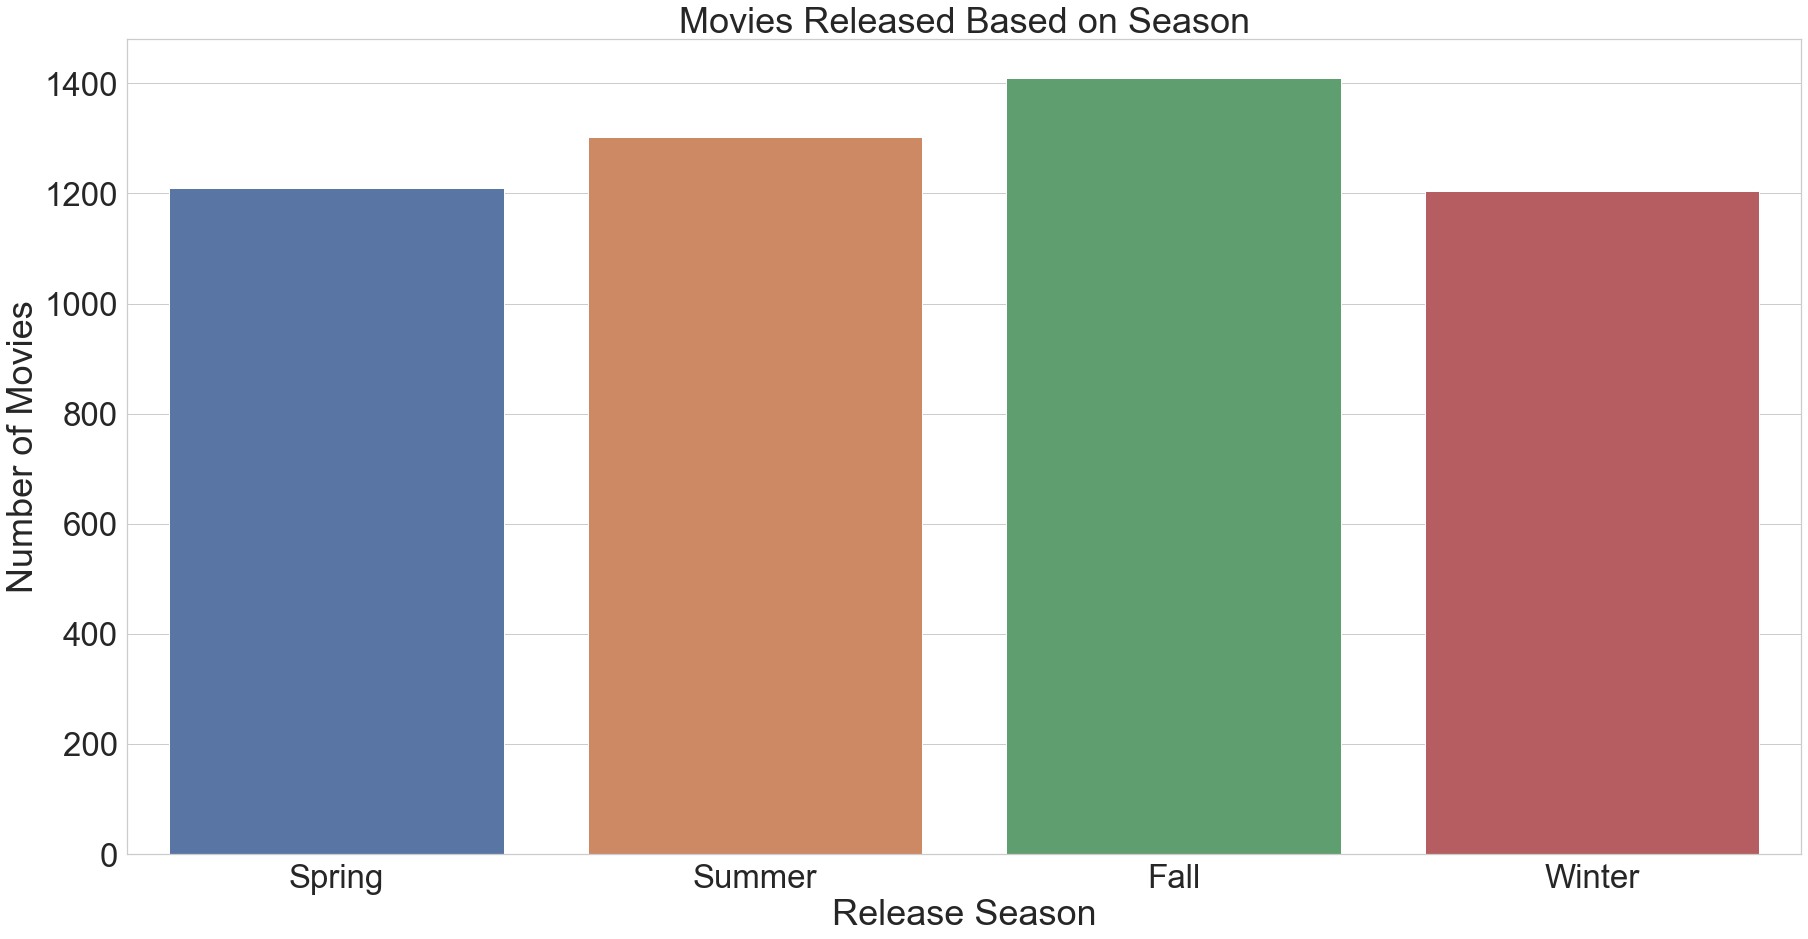

In [21]:
sns.set(style="whitegrid", font_scale=3)
fig = plt.figure(figsize = (30,15))
ax = sns.countplot(x='season', data=df, order=['Spring', 'Summer', 'Fall', 'Winter']) #order= organizes your data by a given list
ax.set_title('Movies Released Based on Season')
plt.xlabel('Release Season')
plt.ylabel('Number of Movies')

plt.show()

### Box Plot and Violin Plot of Release Season Vs. Worldwide R.O.I.

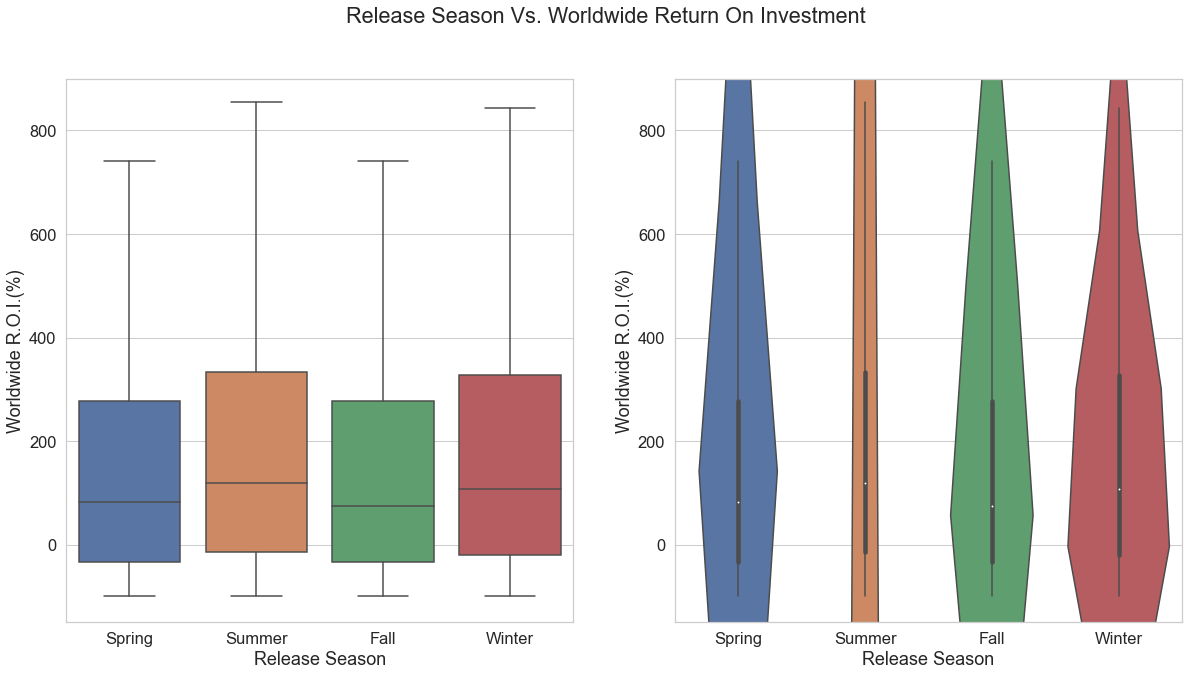

In [22]:
sns.set(style="whitegrid", font_scale=1.5)
fig, axes = plt.subplots(1,2, figsize = (20, 10)) #subplots() returns both a figure object and axes object
fig.suptitle('Release Season Vs. Worldwide Return On Investment')

ax0 = axes[0]
ax0.set_ylim(-150, 900)

sns.boxplot(x='season', y='Worldwide R.O.I.(%)', data=df, fliersize=10, showfliers=False
            , order=['Spring', 'Summer', 'Fall', 'Winter'], ax=ax0) #ax-ax0 says firt row and first column
ax0.set_xlabel('Release Season')

ax1 = axes[1]
ax1.set_ylim(-150, 900) #last outlier left out because it is an extreme outlier that distored the other outliers
sns.violinplot(x='season', y='Worldwide R.O.I.(%)', data=df, fliersize=10, showbox=True, showfliers=True, showcaps=True
            , order=['Spring', 'Summer', 'Fall', 'Winter'], ax=ax1, bw=0.2) #first row second column
ax1.set_xlabel('Release Season')


plt.show()

From the bar graph, we see that movies were released the most in the Fall, second most in Summer, second least in Spring, and least in Winter. From the boxplot, we see that Summer has the highest median value and top whisker with Winter following second, Spring following third, and Fall following last. 

Although, Summer and Winter had high median values, the frequency of movies that achieved around these median is less certain than with the movies from Spring and Fall.

### Bar Graph and Box Plot of Selected Release Months

Now we will breakdown the seasons by the months and see which month is most promising for R.O.I. and relevancy by using another boxplot and bar graph.

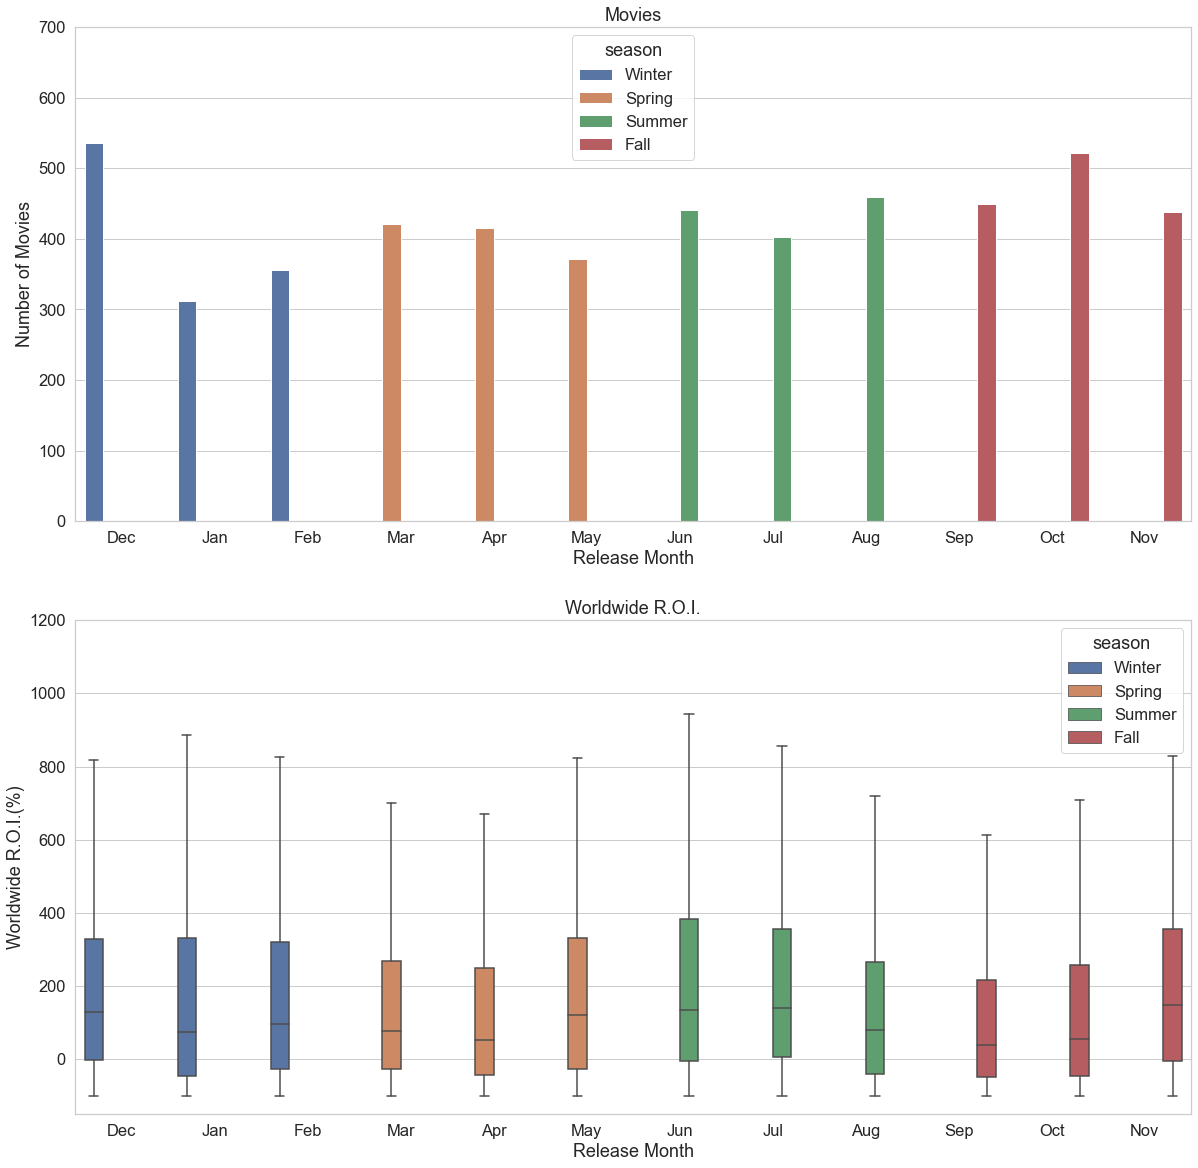

In [23]:
sns.set(style="whitegrid", font_scale=1.5)
fig, axes = plt.subplots(2,1, figsize = (20, 20))

ax0 = axes[0]
ax0.set_ylim(0, 700)
ax0.set_title('Movies')

sns.countplot(x='month', data=df, hue='season', order=['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'
                                                       , 'Sep', 'Oct', 'Nov']
              , hue_order=['Winter', 'Spring', 'Summer', 'Fall'], ax=ax0)
ax0.set_ylabel('Number of Movies')
ax0.set_xlabel('Release Month')


ax1 = axes[1]
ax1.set_ylim(-150, 1200)
ax1.set_title('Worldwide R.O.I.')

sns.boxplot(x='month', y='Worldwide R.O.I.(%)', hue='season', hue_order=['Winter', 'Spring', 'Summer', 'Fall'], data=df
            , fliersize=10, showfliers=False, order=['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'
                                                     , 'Oct', 'Nov'], ax=ax1)
ax1.set_xlabel('Release Month')



plt.show()

### Box Plot and Violin Plot of Selected Release Months

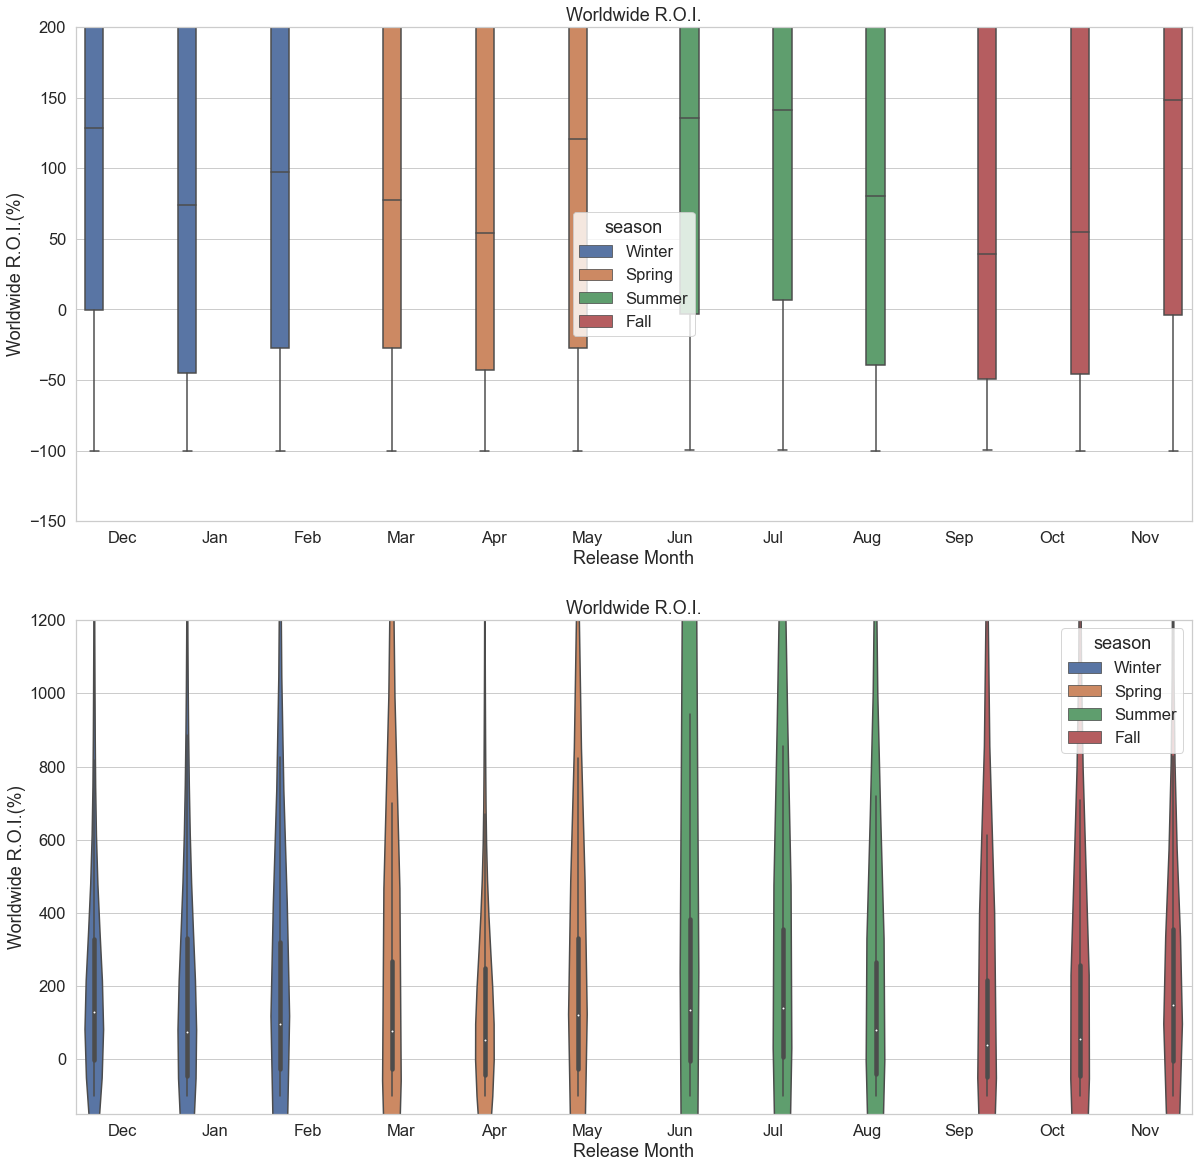

In [24]:
sns.set(style="whitegrid", font_scale=1.5)
fig, axes = plt.subplots(2,1, figsize = (20, 20))


ax0 = axes[0]
ax0.set_ylim(-150, 200)
ax0.set_title('Worldwide R.O.I.')

sns.boxplot(x='month', y='Worldwide R.O.I.(%)', hue='season', hue_order=['Winter', 'Spring', 'Summer', 'Fall'], data=df
            , fliersize=10, showfliers=False, order=['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'
                                                     , 'Oct', 'Nov'], ax=ax0)
ax0.set_xlabel('Release Month')


ax1 = axes[1]
ax1.set_ylim(-150, 1200)
ax1.set_title('Worldwide R.O.I.')

sns.violinplot(x='month', y='Worldwide R.O.I.(%)', hue='season', hue_order=['Winter', 'Spring', 'Summer', 'Fall'], data=df
            , fliersize=10, showfliers=False, order=['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'
                                                     , 'Oct', 'Nov'], bw=0.2, ax=ax1)
ax1.set_xlabel('Release Month')



plt.show()

From the above graphs, we can determine that Nov and Dec not only have high median values, but they also have a higher frequency of those R.O.I.s around the median; thus, these two months are most reliable.

### Bar Graph and Box Plot of Selected Release Days Within the Selected Release Months

Finally we will break down Nov and Dec along with Jun and Jul (because they have high median values) into specific days using the months with median R.O.I. values above 100% and see which days are the best choice for releasing a movie.

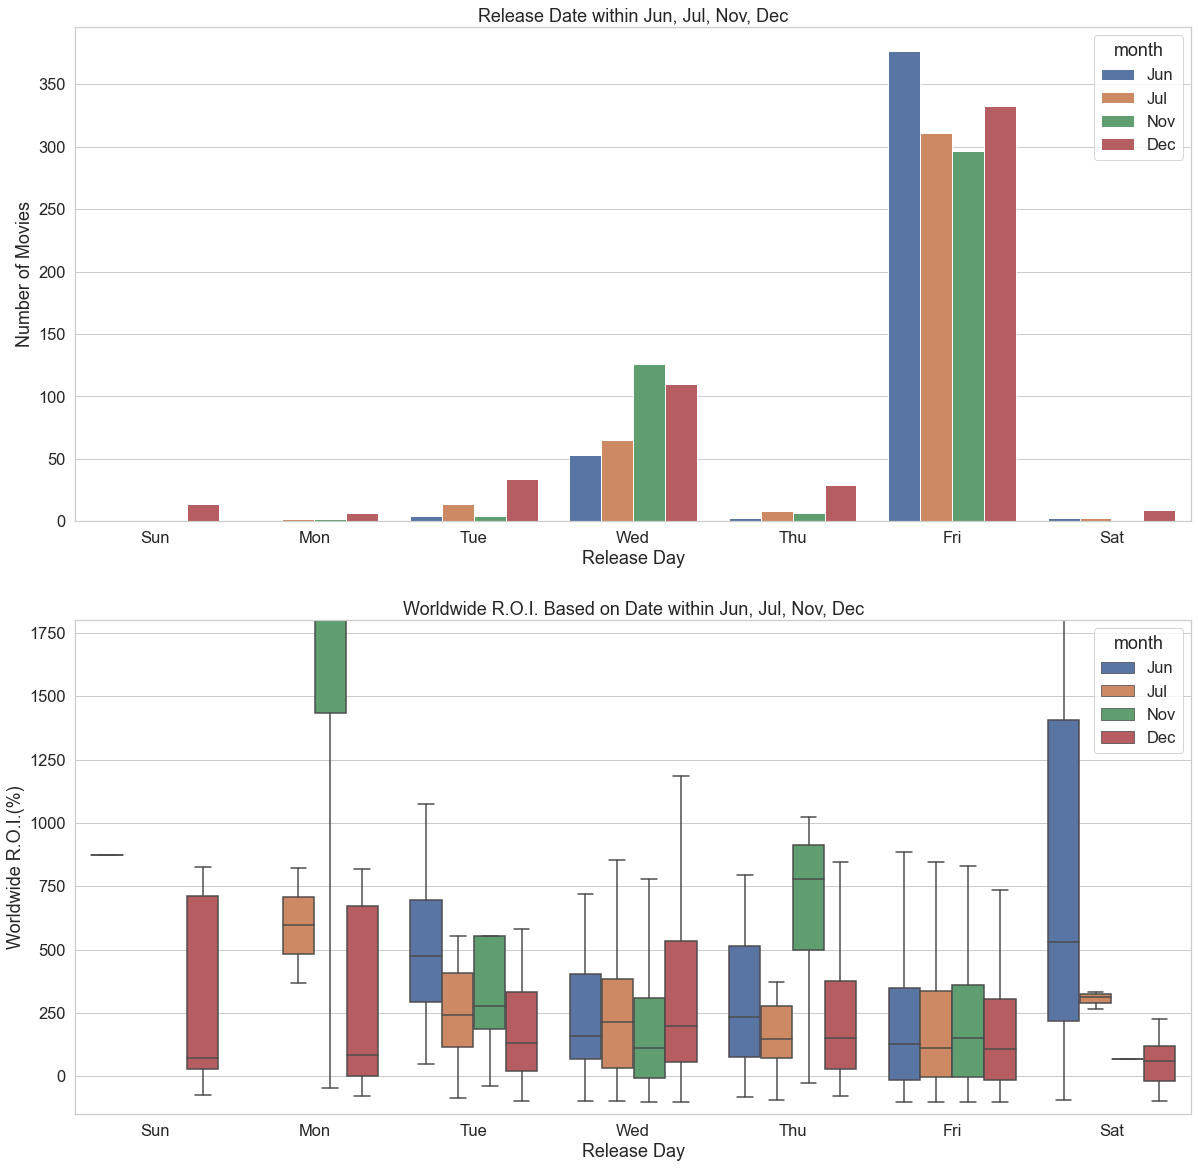

In [25]:
sns.set(style="whitegrid", font_scale=1.5)
fig, axes = plt.subplots(2,1, figsize = (20, 20))


ax0 = axes[0]
ax0.set_title('Release Date within Jun, Jul, Nov, Dec')
sns.countplot(x='day', data=df, hue='month', order=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
                   , hue_order=['Jun','Jul', 'Nov', 'Dec'], ax=ax0)
ax0.set_xlabel('Release Day')
ax0.set_ylabel('Number of Movies')

ax1 = axes[1]
ax1.set_ylim(-150, 1800)
ax1.set_title('Worldwide R.O.I. Based on Date within Jun, Jul, Nov, Dec')

sns.boxplot(x='day', y='Worldwide R.O.I.(%)', hue='month', hue_order=['Jun','Jul', 'Nov', 'Dec'], data=df, fliersize=10
            , showfliers=False, order=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], ax=ax1)
ax1.set_xlabel('Release Day')



plt.show()

### Box Plot and Violin Plot of Selected Release Days Within the Selected Release Months

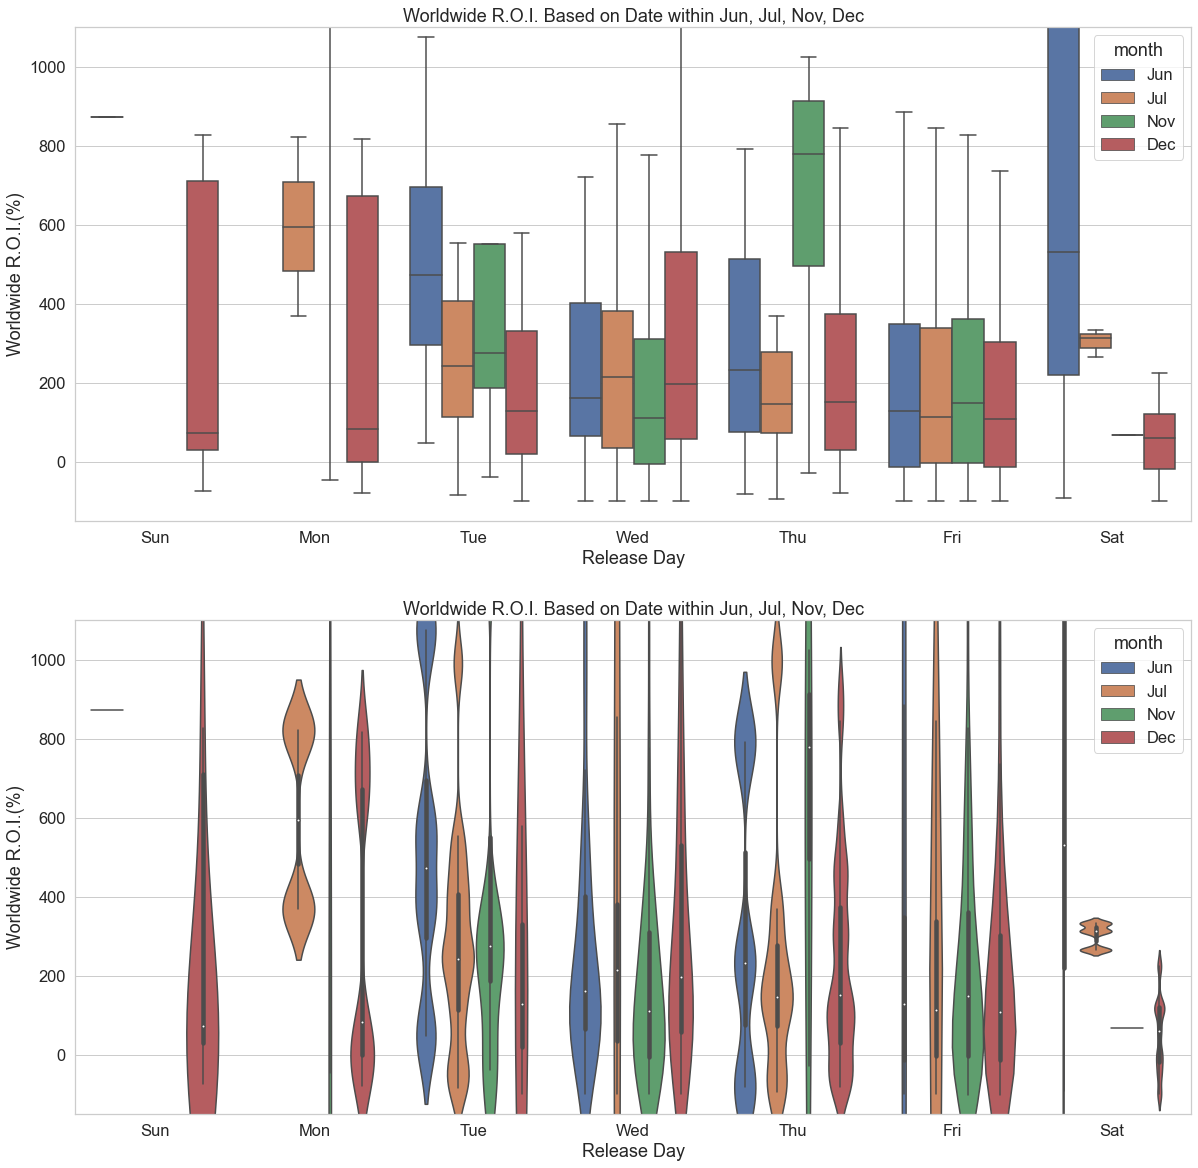

In [26]:
sns.set(style="whitegrid", font_scale=1.5)
fig, axes = plt.subplots(2,1, figsize = (20, 20))


ax0 = axes[0]
ax0.set_ylim(-150,1100)
ax0.set_title('Worldwide R.O.I. Based on Date within Jun, Jul, Nov, Dec')
sns.boxplot(x='day', y='Worldwide R.O.I.(%)', hue='month', hue_order=['Jun','Jul', 'Nov', 'Dec'], data=df, fliersize=10
            , showfliers=False, order=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], ax=ax0)
ax0.set_xlabel('Release Day')

ax1 = axes[1]
ax1.set_ylim(-150, 1100)
ax1.set_title('Worldwide R.O.I. Based on Date within Jun, Jul, Nov, Dec')

sns.violinplot(x='day', y='Worldwide R.O.I.(%)', hue='month', hue_order=['Jun','Jul', 'Nov', 'Dec'], data=df, fliersize=10
            , showfliers=False, order=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], ax=ax1, bw=0.2)
ax1.set_xlabel('Release Day')



plt.show()

From the above graphs, we can recommend a moive release date of Wednesday or Friday.

Now let's store the worldwide R.O.I. data for use in our next Jupyter Notebook, [OMDbBudgetDataAnalysis.ipynb](OMDbBudgetDataAnalysis.ipynb).

In [27]:
dfROI = df[['movie', 'year', 'Worldwide R.O.I.(%)']]

In [28]:
dfROI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5126 entries, 0 to 5125
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   movie                5126 non-null   object 
 1   year                 5126 non-null   object 
 2   Worldwide R.O.I.(%)  5126 non-null   float64
dtypes: float64(1), object(2)
memory usage: 120.3+ KB


In [26]:
%store dfROI

Stored 'dfROI' (DataFrame)


### Resources used for development:
1. https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/
2. https://medium.com/dm03514-tech-blog/devops-decision-making-applying-roi-based-analysis-6f6301ca6123
3. https://www.timeanddate.com/calendar/aboutseasons.html
4. https://www.ncei.noaa.gov/news/meteorological-versus-astronomical-seasons
5. https://docs.python.org/3/library/datetime.html
6. https://www.programiz.com/python-programming/datetime/strftime
7. https://seaborn.pydata.org/api.html#categorical-api